In [1]:
import time
start_time=time.time()

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import lmfit

from bfunc import bfunc00,bfunc01,bfunc02

Data load and region parameters

In [3]:
Sample='lagoon'

samples=pd.read_csv('SampleList//'+Sample+'.csv',header=None)

M8N=dict()
M8=dict()


for i in range(len(samples)):
    M8N[i]=samples[0][i]
    
for i in range(len(samples)):
    M8[i]=pd.read_csv('SFdata//'+M8N[i]+'.csv')    

samples

,0
0,1987OdCast6523A
1,1987OdCast6523B
2,Lagoon1
3,Lagoon2
4,M8H2


In [4]:
M8[3].S

0      0.378206
1      1.249384
2      1.089201
3      1.885368
4      1.987111
5      2.882754
6      3.728582
7      4.888694
8      6.234338
9      8.533920
10    10.750770
11    11.540209
12    12.094474
13    17.035720
14    27.976233
15    41.711991
16    45.313092
Name: S, dtype: float64

In [5]:
B=M8[3].S[1:100]
r=M8[3].pc[1:100]

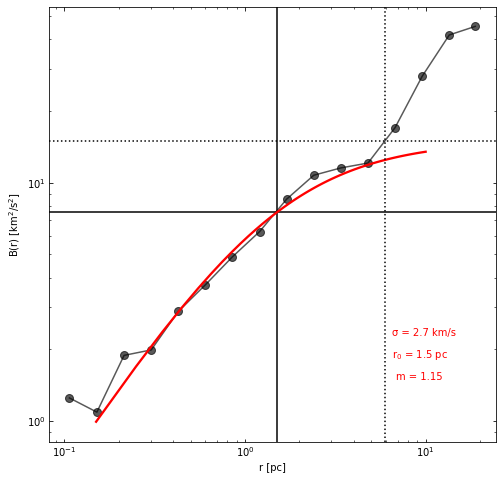

In [6]:
fig, ax=plt.subplots(figsize=(8,8))


plt.loglog(r,B,marker='o',color="black",alpha=0.65,markersize="8")

plt.axhline(y=2.74**2, color='black', linestyle='-')
plt.axhline(y=2*2.74**2, color='black', linestyle=':')
plt.axvline(x=1.5, color='black', linestyle='-')


lo=1.5
ss=2.74**2
n=1.15
x=np.linspace(0.15,10,100)
c=1/(1+(x/lo)**n)
y=2*(1-c)*ss
plt.loglog(x,y,color='r', linestyle='-',linewidth='2.3')

r2 = np.interp(2*ss, M8[3].S, M8[3].pc)
r2
plt.axvline(x=r2, color='black', linestyle=':')

ax.text(0.83, 0.15,'m = 1.15', ha='center', va='center', transform=ax.transAxes, color='red')
ax.text(0.83, 0.20,'r$_{0}$ = 1.5 pc', ha='center', va='center', transform=ax.transAxes, color='red')
ax.text(0.84, 0.25,'σ = 2.7 km/s', ha='center', va='center', transform=ax.transAxes, color='red')
    
ax.set(xlabel='r [pc]', ylabel='B(r) [km$^{2}$/s$^{2}$]')
plt.tick_params(which='both', labelright=False, direction='in', right=True,  top=True)



In [7]:
len(M8[3])

17

In [8]:
rgrid = np.logspace(0.0, 2)

s0 = (0.242*.92)/2.355             
m = 1.15

sig2 = ss
r0 = 1.5

In [9]:
model02 = lmfit.Model(bfunc02)
model02.param_names

['r0', 'sig2', 'm', 's0', 'noise']

In [10]:
relative_uncertainty = 0.2
weights = 1.0 / (relative_uncertainty * B)
weights[r > r0] /= 2.0

In [11]:
for p in model02.param_names:
    model02.set_param_hint(p, min=0.0)
model02.set_param_hint("sig2", value=sig2, vary=False)
#model02.set_param_hint("s0", min=0.2)
model02.print_param_hints()

Name      Value      Min      Max     Vary    Expr    
m           nan        0      inf     True    
noise       nan        0      inf     True    
r0          nan        0      inf     True    
s0          nan        0      inf     True    
sig2     7.5076        0      inf    False    


In [12]:
result2 = model02.fit(
    B, 
    weights=weights,
    r=r, r0=r0, m=m, s0=s0, noise=1/10,
)

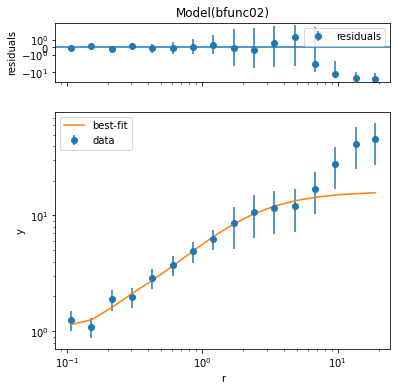

In [13]:
fig, _ = result2.plot()
fig.axes[0].set(
    xscale="log",
    yscale="symlog",
)
fig.axes[1].set(
    xscale="log",
    yscale="log",
);



In [14]:
print(result2.fit_report())

[[Model]]
    Model(bfunc02)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 61
    # data points      = 16
    # variables        = 4
    chi-square         = 8.29428077
    reduced chi-square = 0.69119006
    Akaike info crit   = -2.51236013
    Bayesian info crit = 0.57799476
[[Variables]]
    r0:     1.76156356 +/- 0.31474600 (17.87%) (init = 1.5)
    sig2:   7.5076 (fixed)
    m:      1.48852891 +/- 0.25080615 (16.85%) (init = 1.15)
    s0:     0.09172249 +/- 0.05107824 (55.69%) (init = 0.09453928)
    noise:  1.11962489 +/- 0.22276569 (19.90%) (init = 0.1)
[[Correlations]] (unreported correlations are < 0.100)
    C(r0, m)     = -0.782
    C(s0, noise) =  0.735
    C(r0, s0)    =  0.373
    C(r0, noise) =  0.226
    C(m, s0)     = -0.220
    C(m, noise)  =  0.163


In [15]:
for p in result2.model.param_names:
    result2.params[p].stderr = result2.params[p].value * 0.1

In [16]:
result2.conf_interval()
print(result2.ci_report())

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\lmfit\confidence.py:327: UserWarning: rel_change=-0.05071285689484619 < 1e-05 at iteration 6 and prob(s0=0.036688994810863816) = 0.6791380267858476 < max(sigmas).
  warn(errmsg)
C:\Users\ZAINTEL2\anaconda3\lib\site-packages\lmfit\confidence.py:327: UserWarning: rel_change=-0.05145708153320845 < 1e-05 at iteration 3 and prob(noise=0.7837374213369768) = 0.6751750761998107 < max(sigmas).
  warn(errmsg)


          99.73%    95.45%    68.27%    _BEST_    68.27%    95.45%    99.73%
 r0   :  -0.64454  -0.44957  -0.24989   1.76156  +0.37462  +1.17594  +5.30754
 m    :  -1.00107  -0.54268  -0.23193   1.48853  +0.26330  +0.62670  +1.24966
 s0   :      -inf      -inf      -inf   0.09172  +0.04872  +0.11831  +0.24222
 noise:      -inf      -inf      -inf   1.11962  +0.18016  +0.36631  +0.58258


In [17]:
plt.style.use([
    "seaborn-poster",
])

In [18]:
plot_limits = {
    "s0": [0.0, 0.5],
    "m": [0.5, 2.5],
    "r0": [0.5, 5.0],
    "noise": [0.0, 2.0],
}

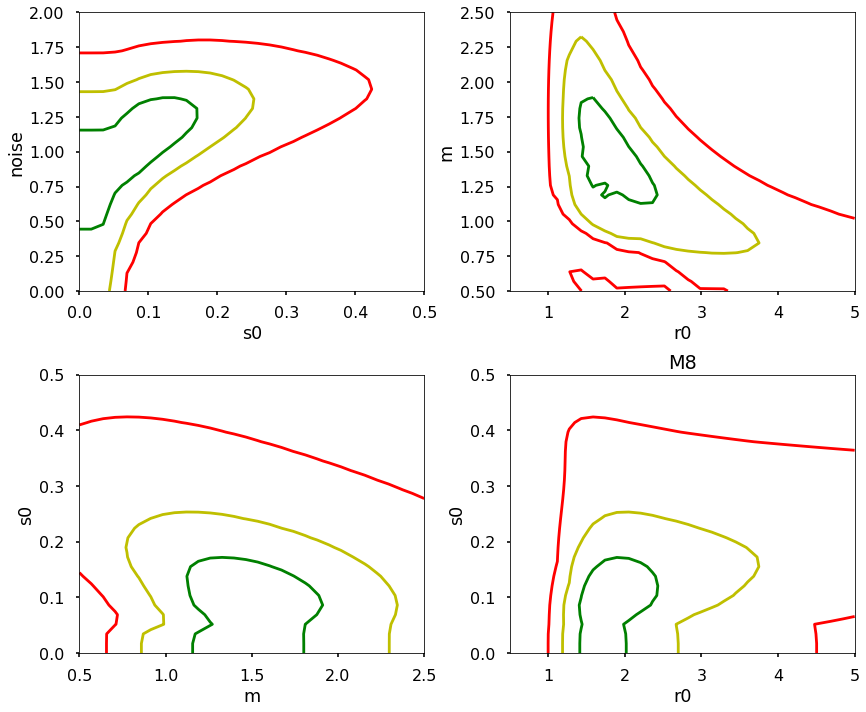

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

plt.title('M8')
levels = [0.6827, 0.9545, 0.9973]
colors = ["g", "y", "r"]

for ax, [xvar, yvar] in zip(axes.flat, [
    ["s0", "noise"],
    ["r0", "m"],
    ["m", "s0"],
    ["r0", "s0"],
]):
    cx, cy, grid = lmfit.conf_interval2d(
        result2, result2, xvar, yvar, 30, 30,
        limits=[plot_limits[xvar], plot_limits[yvar]],
    )
    ctp = ax.contour(cx, cy, grid, levels, colors=colors)
    ax.set_xlabel(xvar)
    ax.set_ylabel(yvar)

fig.tight_layout();

In [20]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 224.3037989139557 seconds ---
